In [1]:
# ФОРМУЛА ТЕЙЛОРА ДЛЯ ФУНКЦИЙ ОДНОЙ ПЕРЕМЕННОЙ

In [3]:
# 1) Открытие текстового файла

#f = open(file_name, access_mode)


|Тип доступа|Описание|
|---|-----|
|r  | Только $чтение$ |
|---|---|
|w  | Только для записи. Примечание*|
|rb | Только для чтения (бинарный) |
|---|---|
|wb | Только для записи (бинарный). Примечание*|
|r+ | Для чтения и записи|
|rb+| Для чтения и записи (бинарный)|
|---|---|
|w+ | Для чтения и записи. Примечание*|
|wb+| Для чтения и записи. Примечание*|
|a  | Откроет для добавления нового содержимого. Примечание*|
|---|---|
|a+ | Откроет для добавления нового содержимого. Примечание*(для чтения записи)|
|ab | Откроет для добавления нового содержимого (бинарный). Примечание*|
|---|---|
|ab+| Откроет для добавления нового содержимого (бинарный). Примечание*(для чтения записи)|
|---|---|
|Примечание* | Создаст новый файл для записи, если не найдет файл с указанным названием |



In [4]:
# 2) Закрытие текстового файла
'''
1-ый способ:
f = open(...)
f.close()

2-ой способ:
f = open(...)
try:
    # работа с файлом
finally:
    f.close()

3-ий способ:
with open('file_name') as f:
    # работа с файлом
'''

"\n1-ый способ:\nf = open(...)\nf.close()\n\n2-ой способ:\nf = open(...)\ntry:\n    # работа с файлом\nfinally:\n    f.close()\n\n3-ий способ:\nwith open('file_name') as f:\n    # работа с файлом\n"

In [8]:
# 3) Чтение и запись файлов
'''
>>> f = open(...)
>>> f.read(n)  # Чтение n символов из файла
! Если использовать снова, интерпритатор будет читать с n+1 символа

>>> f.readline() # Читает только по строке (одной)

---------

>>> f = open(..., 'w')
>>> f.write( 'Hello \nWorld')
=> 
Hello
World
>>> f.close()
'''

"\n>>> f = open(...)\n>>> f.read(n)  # Чтение n символов из файла\n! Если использовать снова, интерпритатор будет читать с n+1 символа\n\n>>> f.readline() # Читает только по строке (одной)\n\n---------\n\n>>> f = open(..., 'w')\n>>> f.write( 'Hello \nWorld')\n=> \nHello\nWorld\n>>> f.close()\n"

In [20]:
import numpy as np
f = open('t1.txt','a')
x = np.pi/2
y = np.sin(x)
f.write("| {x:7.4f} | {y:11.8f} |\n".format(x=x, y=y))
f.close()

'''
7.4f - формат вывода x, которая на первом месте в списке вывода.
Первая Цифра 7 - всего 7 позиций на вывод переменной x
Вторая Цифра 4 - точность результата после запятой
f - указывает, что число следует вывести в формате с плавающей точкой

'''

'\n7.4f - формат вывода x, которая на первом месте в списке вывода.\nПервая Цифра 7 - всего 7 позиций на вывод переменной x\nВторая Цифра 4 - точность результата после запятой\nf - указывает, что число следует вывести в формате с плавающей точкой\n\n'

In [30]:
import numpy as np
f = open('t1.txt','w') 
# Печать в файл заголовка таблицы
f.write('Table of values of sin x\n') 
# Печать в файл шапки таблицы
f.write(' _______________________\n')
x, y = 'x', 'sin x'
f.write('| {x:7} | {y:11} |\n'.format(x=x, y=y))
f.write(' _______________________\n')
f.close()

f = open('t1.txt','a') 
for x in np.linspace(-np.pi, np.pi, 9):
 y=np.sin(x) 
 f.write("| {x:7.4f} | {y:11.8f} |\n".format(x=x, y=y)) 
f.close() 


In [42]:
# ФУНКЦИИ С ПЕРЕМЕННЫМ ЧИСЛОМ АРГУМЕНТОВ
def func(*args): # Много переменных (неименованных)
    return args
print(func(1,2, 'string', [3,4]), '<- Кортеж из аргументов')

def func(**kwargs): # Много именованных переменных
    return kwargs
print(func(a = 1, b = 'string', c = [2,3]))
# BUT !
for i in func(a=1, b ='string', c = [2,3]):
    print(i)

(1, 2, 'string', [3, 4]) <- Кортеж из аргументов
{'a': 1, 'b': 'string', 'c': [2, 3]}
a
b
c


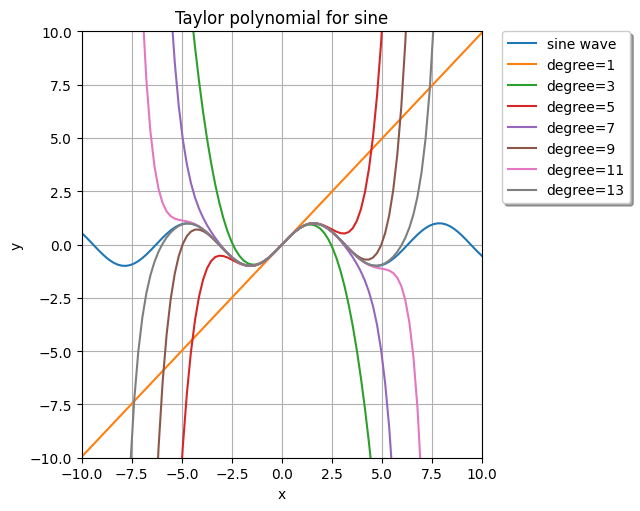

In [4]:
# ФОРМУЛА ТЕЙЛОРА В PYTHON
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import approximate_taylor_polynomial

#approximate_taylor_polynomial(f, x, degree, scale, order=None)
'''
f - функция, для которой ищется многочлен Тейлора
x - скаляр, точка, в которой рассчитывается многочлен
degree - целое, степень многочлена Тейлора
scale - скаляр, ширина интервала, используемая для расчета многочлена Тейлора
order - целое/None, опциональный параметр, степень многочлена,
        используемого для подгонки. При None -> = degree
'''

x = np.linspace(-10.0, 10.0, 100)
plt.plot(x, np.sin(x), label="sine wave")

for degree in range(1,15,2):
    sin_taylor = approximate_taylor_polynomial(
        np.sin, 0, degree, 1, order = degree + 2)
    plt.plot(x, sin_taylor(x), label=f'degree={degree}')

plt.legend(bbox_to_anchor=(1.05, 1), loc = 'upper left',
           borderaxespad=0.0, shadow=True)
plt.tight_layout()
plt.axis([-10,10, -10,10])
plt.title('Taylor polynomial for sine')

plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()


In [3]:
# УПРАЖНЕНИЕ 2
# ~ func, point, n - number of derivatives
# => vector w/ len() = n + 1
# 1st item : f(x0); f'(x0), f''(x0)...

def func(f, x0, n, plot):
    x = np.linspace(-10,10,100)
    if plot == True:
        plt.plot(x, f(x + x0), label=str(f)[8:][:3])
    A = []
    A.append(f(x0))
    for degree in range(1,n+1):
        f_taylor = approximate_taylor_polynomial(
            f, x0, degree, 1, order=None)
        if plot == True:
            plt.plot(x, f_taylor(x), label=f'degree = {degree}')
        A.append(f_taylor(x0))
    if plot == True:
        plt.legend(bbox_to_anchor=(1.05, 1), loc = 'upper left',
           borderaxespad=0.0, shadow=True)
        plt.tight_layout()
        plt.axis([-10,10, -10,10])
        plt.title(f'Taylor polynomial for {str(f)[8:][:3]}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid()
        plt.show()
    return A

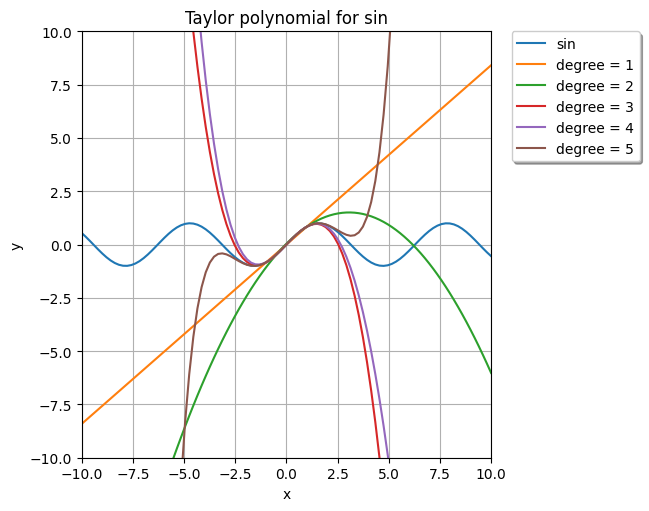

[0.0, 0.0, 0.03912669746683653, -2.1065685354484934e-17, 0.0004995154604224173, 1.4376155161367228e-17]


In [70]:
print(func(np.sin, 0, 5, True))

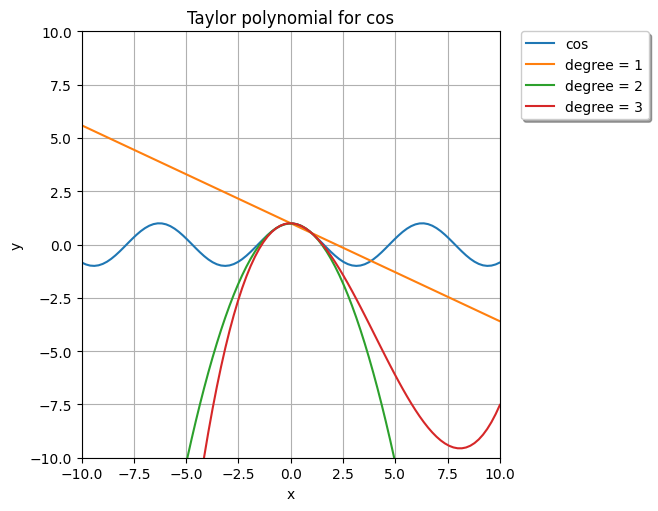

[1.0, 1.0, 0.9900093138977838, 0.9999999999999999]


In [71]:
print(func(np.cos, 0 , 3, True))

C:\Users\Thunboo\AppData\Local\Temp\ipykernel_9388\807739178.py:8: RuntimeWarning: invalid value encountered in log
  plt.plot(x, f(x + x0), label=str(f)[8:][:3])


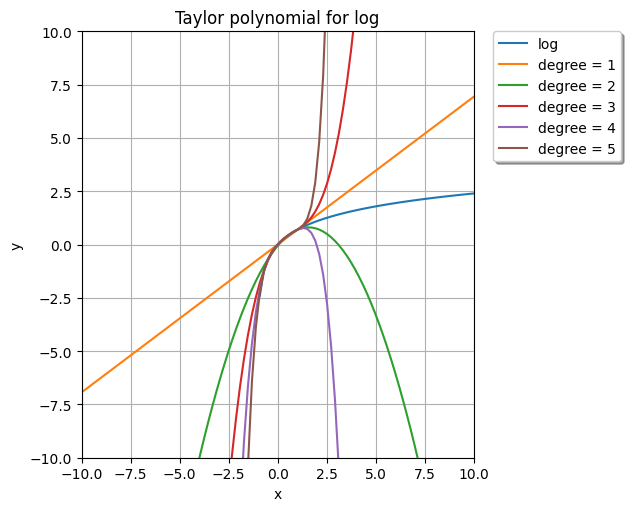

[0.0, 0.6931471805599453, 0.6931471805599454, 0.6931471805599453, 0.6931471805599454, 0.6931471805599453]


In [72]:
print(func(np.log, 1, 5, True))

0.0
0.0
 
0.8415 x
         2
-0.1565 x + 0.9589 x + 0.03913
         3             2
-0.1545 x - 5.551e-17 x + 0.996 x - 2.107e-17


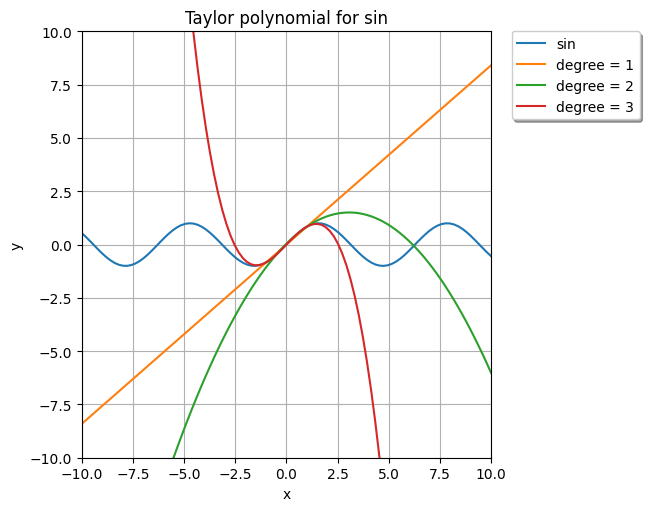

In [21]:
from sympy import Symbol
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import approximate_taylor_polynomial

f = np.sin
x0 = 0
n = 1
A = func(f, x0, n, False)
arr = [x0, n, A] 

def func2(arr):
    x0 = arr[0]
    n  = arr[1]
    v  = arr[2]
    x = Symbol('x')
    l = len(v) - 1
    print(l)
    S = x**0 - 1
    for i in range(l,0,-1):
        S += A[l-i]*x**i
    return S

for i in arr[2]: print(i)

print( approximate_taylor_polynomial(np.sin, 0, 1, 1, order=None) )
print( approximate_taylor_polynomial(np.sin, 0, 2, 1, order=None) )
print( approximate_taylor_polynomial(np.sin, 0, 3, 1, order=None) )

ns = [1,2,3]
f = np.sin
x = np.linspace(-10,10,100)
plt.plot(x, np.sin(x), label=str(f)[8:][:3])
for degree in ns:
    f_taylor = approximate_taylor_polynomial(
            f, x0, degree, 1, order=None)
    plt.plot(x, f_taylor(x), label=f'degree = {degree}')
plt.legend(bbox_to_anchor=(1.05, 1), loc = 'upper left',
           borderaxespad=0.0, shadow=True)
plt.tight_layout()
plt.axis([-10,10, -10,10])
plt.title(f'Taylor polynomial for {str(f)[8:][:3]}')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()


#print(func2(arr))

 
-0.4597 x + 1
         2
-0.4497 x - 1.11e-16 x + 0.99
         4             3          2
0.03929 x + 2.776e-16 x - 0.4989 x - 2.307e-16 x + 0.9999


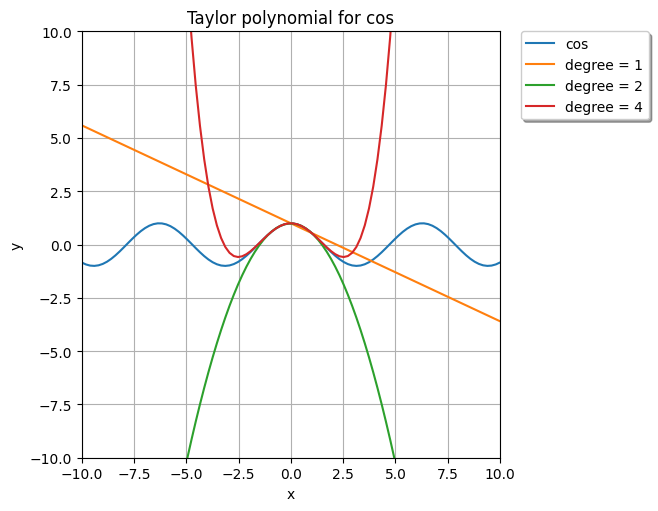

In [22]:
print( approximate_taylor_polynomial(np.cos, 0, 1, 1, order=None) )
print( approximate_taylor_polynomial(np.cos, 0, 2, 1, order=None) )
print( approximate_taylor_polynomial(np.cos, 0, 4, 1, order=None) )

ns = [1,2,4]
f = np.cos
x = np.linspace(-10,10,100)
plt.plot(x, np.cos(x), label=str(f)[8:][:3])
for degree in ns:
    f_taylor = approximate_taylor_polynomial(
            f, x0, degree, 1, order=None)
    plt.plot(x, f_taylor(x), label=f'degree = {degree}')
plt.legend(bbox_to_anchor=(1.05, 1), loc = 'upper left',
           borderaxespad=0.0, shadow=True)
plt.tight_layout()
plt.axis([-10,10, -10,10])
plt.title(f'Taylor polynomial for {str(f)[8:][:3]}')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

 
0.1823 x + 1.609
          2
-0.01777 x + 0.2007 x + 1.609
            4            3           2
-0.0003521 x + 0.002716 x - 0.02004 x + 0.2 x + 1.609


C:\Users\Thunboo\AppData\Local\Temp\ipykernel_10472\1705575375.py:9: RuntimeWarning: invalid value encountered in log
  plt.plot(x, f(x + x0), label=str(f)[8:][:3])


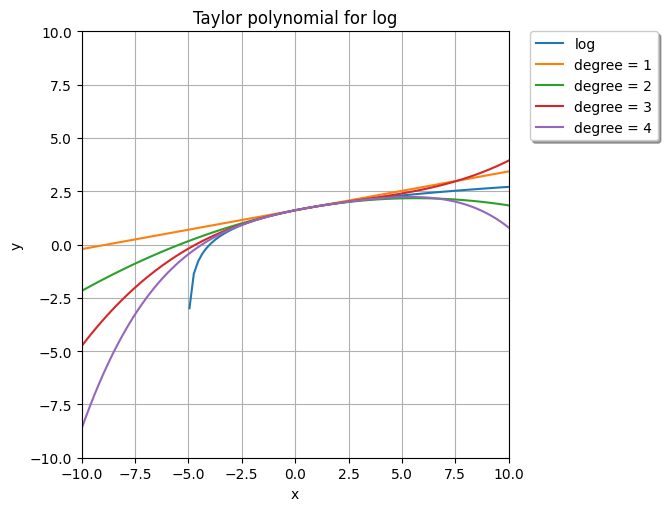

[1.6094379124341003, 2.5210456964038737, 2.168075187350391, 2.398919212126961, 2.2277858183932286]


In [29]:
print( approximate_taylor_polynomial(np.log, 5, 1, 1, order=None) )
print( approximate_taylor_polynomial(np.log, 5, 2, 1, order=None) )
print( approximate_taylor_polynomial(np.log, 5, 4, 1, order=None) )

ns = [1,2,4]
f = np.log
x0 = 5
'''
x = np.linspace(-10,10,100)
plt.plot(x, f(x), label=str(f)[8:][:3])
for degree in ns:
    f_taylor = approximate_taylor_polynomial(
            f, x0, degree, 1, order=None)
    plt.plot(x, f_taylor(x), label=f'degree = {degree}')
plt.legend(bbox_to_anchor=(1.05, 1), loc = 'upper left',
           borderaxespad=0.0, shadow=True)
plt.tight_layout()
plt.axis([-10,10, -10,10])
plt.title(f'Taylor polynomial for {str(f)[8:][:3]}')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()
'''
print(func(np.log, 5, 4, True))

C:\Users\Thunboo\AppData\Local\Temp\ipykernel_10472\3292195675.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(4+x)


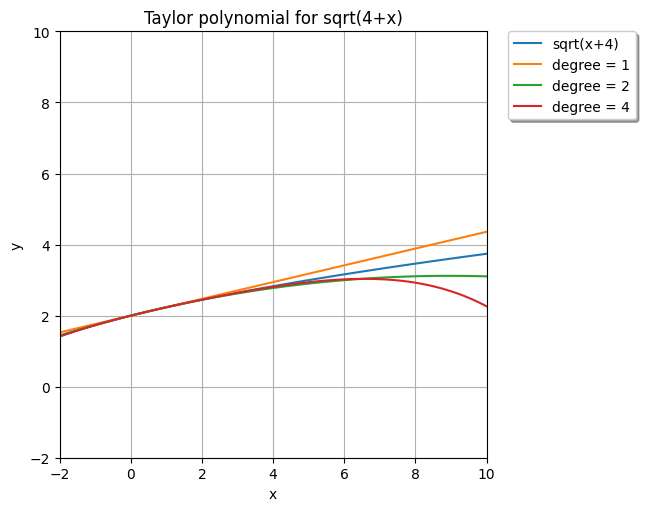

In [33]:
# Упражнение С1
def f(x):
    return np.sqrt(4+x)
x0, ns = 0, [1,2,4]

x = np.linspace(-10,10,100)
plt.plot(x, f(x), label='sqrt(x+4)')
for degree in ns:
    f_taylor = approximate_taylor_polynomial(
            f, x0, degree, 1, order=None)
    plt.plot(x, f_taylor(x), label=f'degree = {degree}')
plt.legend(bbox_to_anchor=(1.05, 1), loc = 'upper left',
           borderaxespad=0.0, shadow=True)
plt.tight_layout()
plt.axis([-2,10, -2,10])
plt.title(f'Taylor polynomial for sqrt(4+x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()



C:\Users\Thunboo\AppData\Local\Temp\ipykernel_10472\901704850.py:20: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Thunboo\AppData\Local\Temp\ipykernel_10472\901704850.py:14: RuntimeWarning: invalid value encountered in log
  plt.plot(x, f(x+x0), label=str(f)[8:][:3])


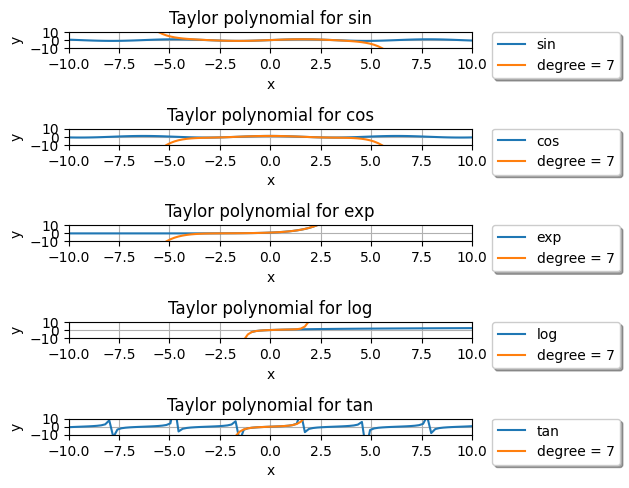

In [40]:
# Упражнение С2 
# 1)
x0 = 0
fs = [np.sin, np.cos, np.exp, np.log, np.tan]

degree = 7
x = np.linspace(-10,10,100)
for f in fs:
    plt.subplot(len(fs), 1, fs.index(f)+1)
    if f == np.log:
        x0 = 1
    else: 
        x0 = 0
    plt.plot(x, f(x+x0), label=str(f)[8:][:3])
    f_taylor = approximate_taylor_polynomial(
            f, x0, degree, 1, order=None)
    plt.plot(x, f_taylor(x), label=f'degree = {degree}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc = 'upper left',
           borderaxespad=0.0, shadow=True)
    plt.tight_layout()
    plt.axis([-10,10, -10,10])
    plt.title(f'Taylor polynomial for {str(f)[8:][:3]}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
plt.show()


C:\Users\Thunboo\AppData\Local\Temp\ipykernel_10472\3895515706.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


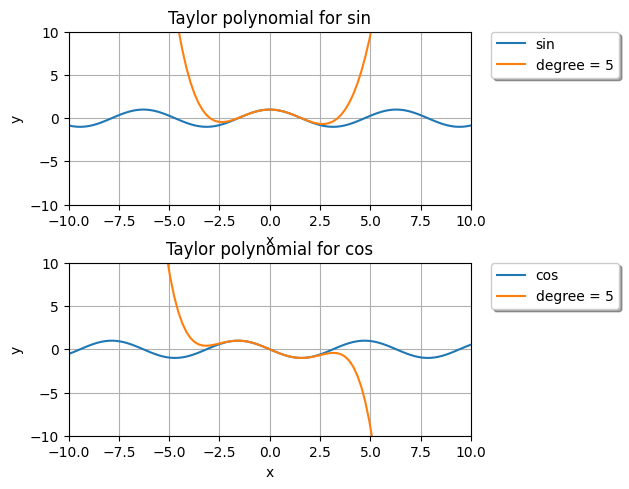

In [41]:
# 2)
x0 = np.pi/2
fs = [np.sin, np.cos]

degree = 5
x = np.linspace(-10,10,100)
for f in fs:
    plt.subplot(len(fs), 1, fs.index(f)+1)
    plt.plot(x, f(x+x0), label=str(f)[8:][:3])
    f_taylor = approximate_taylor_polynomial(
            f, x0, degree, 1, order=None)
    plt.plot(x, f_taylor(x), label=f'degree = {degree}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc = 'upper left',
           borderaxespad=0.0, shadow=True)
    plt.tight_layout()
    plt.axis([-10,10, -10,10])
    plt.title(f'Taylor polynomial for {str(f)[8:][:3]}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
plt.show()


In [ ]:
# Ответы на вопросы
'''


'''